Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [324]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [325]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [326]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
print(fi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [327]:
from numpy import linalg
# Vaš kôd ovdje
trans = np.transpose(fi)
pseudoinverz1 = (linalg.inv(trans @ fi)) @ trans 
pseudoinverz2 = linalg.pinv(fi)
w = pseudoinverz1 @ y
print(w)

[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [328]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
h = np.dot(fi, w)
print(h)
error = mean_squared_error(y, h)
print(error)

[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [329]:
# Vaš kôd ovdje
try:
    w = np.dot(np.linalg.inv(fi), y)
except:
    print("w ne možemo pronaći na ovaj način, fi nema inverz")

w ne možemo pronaći na ovaj način, fi nema inverz


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [330]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(fi, y)
h2 = reg.predict(fi)
print(h2)
error2 = mean_squared_error(y, h2)
print(error2)

[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [331]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    retVal = []
    for x in X :
        retVal.append(double(f(x) + normal(0, noise, 1)))
    return retVal

In [332]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [333]:
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2 * (x**2) - 5 * (x**3)
x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

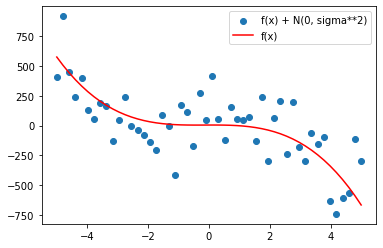

In [334]:
# Vaš kôd ovdje
plt.scatter(x, y, label = 'f(x) + N(0, sigma**2)')
plt.plot(x, f(x), 'r', label = 'f(x)')
plt.legend(loc = 'upper right')

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

[ 5.12642869 26.25250215 -1.14012657 -5.75524714]
39365.793417914596


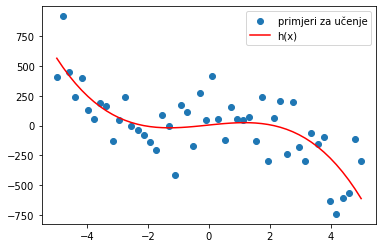

In [335]:
# Vaš kôd ovdje
poly3 = PolynomialFeatures(3)
fi3 = poly3.fit_transform(x)
w3 = linalg.pinv(fi3) @ y
h3 = np.dot(fi3, w3)
print(w3)
error3 = mean_squared_error(y, h3)
print(error3)

plt.scatter(x, y, label = 'primjeri za učenje')
plt.plot(x, h3, 'r', label = 'h(x)')
plt.legend(loc = 'upper right')

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

pogreške učenja: 
[52723.31745784917, 39365.793417914596, 33337.41469668349, 25938.730327139092, 20694.569228186192]


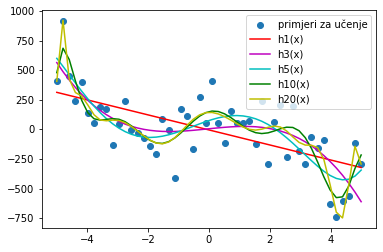

In [336]:
# Vaš kôd ovdje
d = [1, 3, 5, 10, 20]
h = []
error = []

for i in d :
    fi_i = PolynomialFeatures(i).fit_transform(x)
    w_i = linalg.pinv(fi_i) @ y
    h_i = np.dot(fi_i, w_i)
    error_i = mean_squared_error(y, h_i)
    h.append(h_i)
    error.append(error_i)
print("pogreške učenja: ")
print(error)

plt.scatter(x, y, label = 'primjeri za učenje')

plt.plot(x, h[0], 'r', label = 'h1(x)')
plt.plot(x, h[1], 'm', label = 'h3(x)')
plt.plot(x, h[2], 'c', label = 'h5(x)')
plt.plot(x, h[3], 'g', label = 'h10(x)')
plt.plot(x, h[4], 'y', label = 'h20(x)')

plt.legend(loc = 'upper right')

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

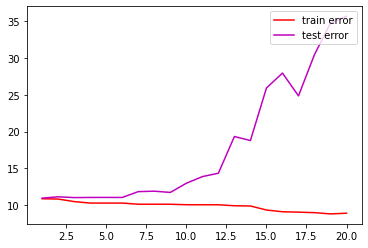

In [337]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5)
d = []
for i in range (1,21) :
    d.append(i)
    
train_error = []
test_error = []
for i in d :
    fi_train = PolynomialFeatures(i).fit_transform(x_train)
    w_train = linalg.pinv(fi_train) @ y_train
    h_train = np.dot(fi_train, w_train)
    error_train = mean_squared_error(y_train, h_train)
    train_error.append(np.log(error_train))
    
    fi_test = PolynomialFeatures(i).fit_transform(x_test)
    h_test = np.dot(fi_test, w_train)
    error_test = mean_squared_error(y_test, h_test)
    test_error.append(np.log(error_test))
    
plt.plot(d, train_error, 'r', label = 'train error')
plt.plot(d, test_error, 'm', label = 'test error')
plt.legend(loc = 'upper right')

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

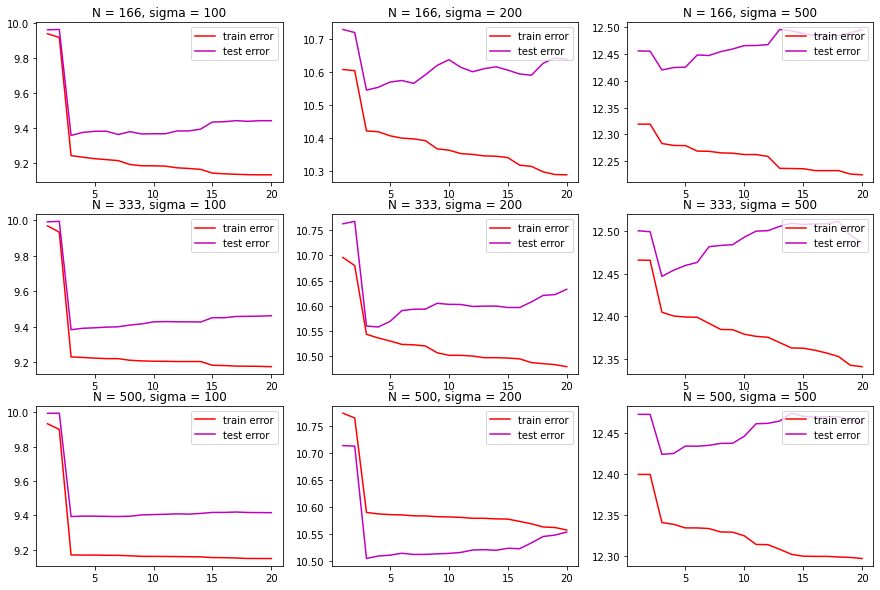

In [338]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, train_size = 0.5)
sigma = [100, 200, 500]

y_train = []
y_test = []

for s in sigma :
    y_train.append(make_labels(X_train, f, s))
    y_test.append(make_labels(X_test, f, s))
    
fig, axs = plt.subplots(3, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

for i in range(9):
    train_error = []
    test_error = []
    index = int(500 * (i//3 + 1)/3)
    X_train_select = X_train[0 : index]
    X_test_select = X_test[0 : index]
    y_train_select = []
    y_test_select = [] 
    for a in range(3) :
        y_train_select.append(y_train[a][0 : index])
        y_test_select.append(y_test[a][0 : index])

    for stupanj in d :
        fi_train = PolynomialFeatures(stupanj).fit_transform(X_train_select)
        w_train = linalg.pinv(fi_train) @ y_train_select[i % 3]
        h_train = np.dot(fi_train, w_train)
        error_train = mean_squared_error(y_train_select[i % 3], h_train)
        train_error.append(np.log(error_train))
    
        fi_test = PolynomialFeatures(stupanj).fit_transform(X_test_select)
        h_test = np.dot(fi_test, w_train)
        error_test = mean_squared_error(y_test_select[i % 3], h_test)
        test_error.append(np.log(error_test))
    
    axs[i//3,i%3].plot(d, train_error, 'r', label = 'train error')
    axs[i//3,i%3].plot(d, test_error, 'm', label = 'test error')
    axs[i//3,i%3].legend(loc = 'upper right')
    axs[i//3,i%3].set_title('N = %d, sigma = %d' % (index, sigma[i % 3]))
    
    

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [339]:
# Vaš kôd ovdje
l = [0, 1, 10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
fi = PolynomialFeatures(3).fit_transform(X)
fi_trans = np.transpose(fi)
I = np.eye(4)
I[0][0] = 0
w = []
for i in l :
    pseudoinverz = linalg.inv(fi_trans @ fi + i * I) @ fi_trans
    w.append(pseudoinverz @ y)
for i in range (3):
    print(w[i])

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [340]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
wL2 = []
for i in l:
    wL2.append(Ridge(i).fit(fi, y).coef_)
    
for array in wL2:
    print(array)

[ 0.         -5.91666667  3.375      -0.45833333]
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
[ 0.         -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

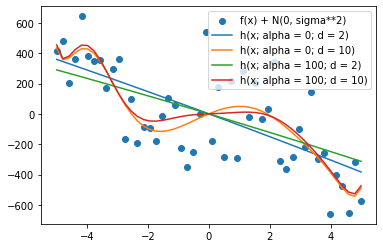

In [341]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)
alpha = [0, 100]
d = [2, 10]
plt.scatter(x, y, label = 'f(x) + N(0, sigma**2)')
for a in alpha:
    for stupanj in d:
        fi = PolynomialFeatures(stupanj).fit_transform(X)
        wL = Ridge(a).fit(fi, y).coef_
        h = np.dot(fi, wL)
        plt.plot(X, h, label = 'h(x; alpha = %d; d = %d)' % (a, stupanj))
plt.legend(loc = 'best')


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


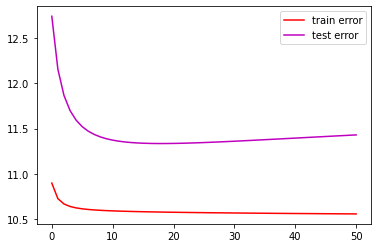

In [361]:
# Vaš kôd ovdje
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
alpha = range(51)
d = 10
train_error = []
test_error = []

for a in alpha :
    fi_train = PolynomialFeatures(d).fit_transform(x_train) 
    wL = Ridge(a).fit(fi_train, y_train).coef_
    h_train = np.dot(fi_train, wL)
    train_error.append(np.log(mean_squared_error(y_train, h_train)))
    
    fi_test = PolynomialFeatures(d).fit_transform(x_test)
    h_test = np.dot(fi_test, wL)
    test_error.append(np.log(mean_squared_error(y_test, h_test)))
    
plt.plot(alpha, train_error, 'r', label = 'train error')
plt.plot(alpha, test_error, 'm', label = 'test error')
plt.legend(loc = 'upper right')

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [362]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

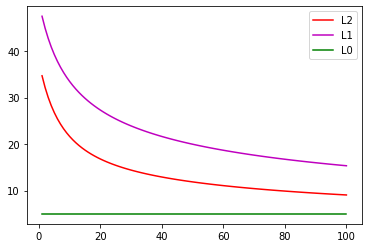

In [366]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5)
d = 5
alpha = range(1, 101)
L0 = []
L1 = []
L2 = []
for a in alpha :
    fi_train = PolynomialFeatures(d).fit_transform(x_train) 
    wL = Ridge(a).fit(fi_train, y_train).coef_
    L2.append(sqrt(np.dot(np.transpose(wL), wL)))
    w_tmp = 0
    for w in wL:
        w_tmp += abs(w)
    L1.append(w_tmp)
    L0.append(nonzeroes(wL))
    
plt.plot(alpha, L2, 'r', label = 'L2')
plt.plot(alpha, L1, 'm', label = 'L1')
plt.plot(alpha, L0, 'g', label = 'L0')
plt.legend(loc = 'upper right')



### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

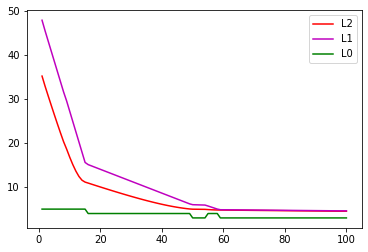

In [367]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

L0 = []
L1 = []
L2 = []
for a in alpha :
    fi_train = PolynomialFeatures(d).fit_transform(x_train) 
    wL = Lasso(a).fit(fi_train, y_train).coef_
    L2.append(sqrt(np.dot(np.transpose(wL), wL)))
    w_tmp = 0
    for w in wL:
        w_tmp += abs(w)
    L1.append(w_tmp)
    L0.append(nonzeroes(wL))
    
plt.plot(alpha, L2, 'r', label = 'L2')
plt.plot(alpha, L1, 'm', label = 'L1')
plt.plot(alpha, L0, 'g', label = 'L0')
plt.legend(loc = 'upper right')

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [376]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T
# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

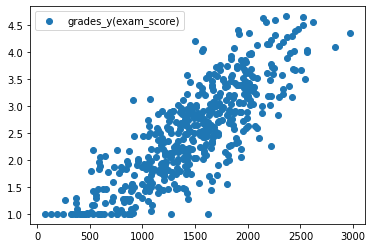

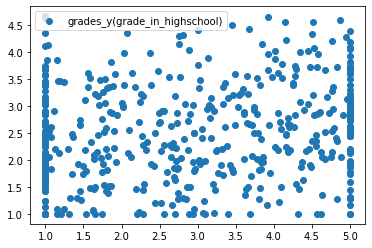

In [387]:
# Vaš kôd ovdje
plt.figure(1)
plt.scatter(exam_score, grades_y, label = 'grades_y(exam_score)')
plt.legend(loc = 'best')
plt.figure(2)
plt.scatter(grade_in_highschool, grades_y, label = 'grades_y(grade_in_highschool)')
plt.legend(loc = 'best')

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

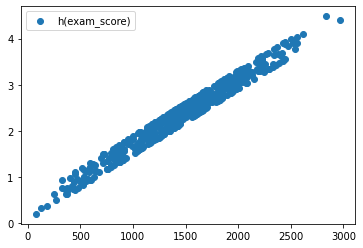

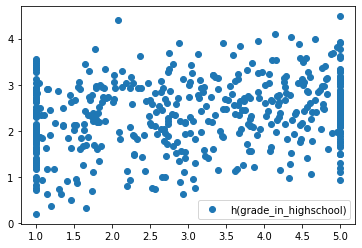

In [390]:
# Vaš kôd ovdje
fi = PolynomialFeatures(1).fit_transform(grades_X) 
wL = Ridge(0.01).fit(fi, grades_y).coef_
h = np.dot(fi, wL)
plt.figure(1)
plt.scatter(exam_score, h, label = 'h(exam_score)')
plt.legend(loc = 'best')
plt.figure(2)
plt.scatter(grade_in_highschool, h, label = 'h(grade_in_highschool)')
plt.legend(loc = 'best')

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

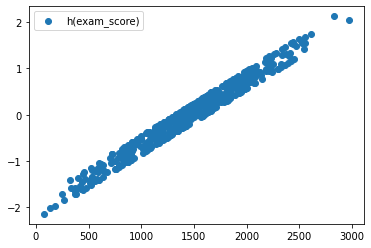

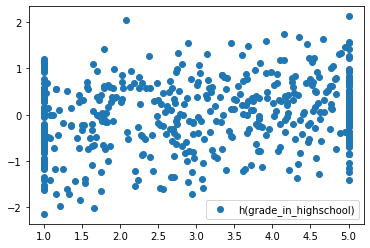

In [402]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler().fit(grades_X)
grades_X_fixed = scaler.transform(grades_X)
#scaler = StandardScaler().fit(grades_y)
grades_y_fixed = grades_y

fi = PolynomialFeatures(1).fit_transform(grades_X_fixed) 
wL = Ridge(0.01).fit(fi, grades_y_fixed).coef_
h = np.dot(fi, wL)
plt.figure(1)
plt.scatter(exam_score, h, label = 'h(exam_score)')
plt.legend(loc = 'best')
plt.figure(2)
plt.scatter(grade_in_highschool, h, label = 'h(grade_in_highschool)')
plt.legend(loc = 'best')

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [411]:
# Vaš kôd ovdje
print(grades_X_fixed)
grades_X_fixed_colinear = grades_X_fixed
grades_X_fixed_colinear[2] = grades_X_fixed[1]
print(grades_X_fixed_colinear)

[[ 4.47203826e-01 -1.28800873e+00]
 [-1.00686868e+00 -1.00386008e+00]
 [ 6.82533982e-01 -1.02406176e+00]
 [-1.00495543e+00  5.04714607e-01]
 [-1.95775557e+00  5.74645410e-01]
 [-4.83287783e-02  8.72709579e-01]
 [ 7.24625555e-01 -4.70224665e-01]
 [ 5.81131557e-01  8.72709579e-01]
 [ 3.85979721e-01  6.03091198e-01]
 [ 2.31006203e-01 -6.66007261e-01]
 [-6.43350555e-01 -1.88600673e+00]
 [-9.28425296e-01  5.17620940e-02]
 [-1.23263257e+00 -1.45617459e+00]
 [ 6.99753262e-01  7.30993385e-01]
 [-1.69946638e+00 -1.31091915e+00]
 [-5.47687890e-01 -1.26122523e+00]
 [-9.05466257e-01  8.72709579e-01]
 [-2.29257490e+00 -1.88600673e+00]
 [-2.19691223e+00 -1.51774554e+00]
 [-1.76516749e-01 -1.88600673e+00]
 [ 4.64423106e-01  3.83517744e-01]
 [-1.54831937e+00 -5.72922769e-01]
 [ 2.78837536e-01  8.72709579e-01]
 [-1.49283502e+00  5.07763782e-01]
 [-2.32510020e+00 -1.51490588e+00]
 [-1.57127840e+00 -1.88600673e+00]
 [-2.68352908e-01 -3.39689500e-01]
 [-2.43606890e+00  6.07979332e-01]
 [-4.09933652e-01 -3

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [ ]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [ ]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.